In [1]:
from sklearn.metrics import balanced_accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skfeature.function.similarity_based import fisher_score

# 1. Wczytanie danych i rzut oka na ich strukturę

In [2]:
X = pd.read_csv('artifical_train_data.csv')
y = pd.read_csv('artifical_train_labels.csv')
Z_test = pd.read_csv('artifical_test_data.csv')

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2000 non-null   int64
 1   1       2000 non-null   int64
 2   2       2000 non-null   int64
 3   3       2000 non-null   int64
 4   4       2000 non-null   int64
 5   5       2000 non-null   int64
 6   6       2000 non-null   int64
 7   7       2000 non-null   int64
 8   8       2000 non-null   int64
 9   9       2000 non-null   int64
 10  10      2000 non-null   int64
 11  11      2000 non-null   int64
 12  12      2000 non-null   int64
 13  13      2000 non-null   int64
 14  14      2000 non-null   int64
 15  15      2000 non-null   int64
 16  16      2000 non-null   int64
 17  17      2000 non-null   int64
 18  18      2000 non-null   int64
 19  19      2000 non-null   int64
 20  20      2000 non-null   int64
 21  21      2000 non-null   int64
 22  22      2000 non-null   int64
 23  23      2000 

In [4]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


In [5]:
Z_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       600 non-null    int64
 1   1       600 non-null    int64
 2   2       600 non-null    int64
 3   3       600 non-null    int64
 4   4       600 non-null    int64
 5   5       600 non-null    int64
 6   6       600 non-null    int64
 7   7       600 non-null    int64
 8   8       600 non-null    int64
 9   9       600 non-null    int64
 10  10      600 non-null    int64
 11  11      600 non-null    int64
 12  12      600 non-null    int64
 13  13      600 non-null    int64
 14  14      600 non-null    int64
 15  15      600 non-null    int64
 16  16      600 non-null    int64
 17  17      600 non-null    int64
 18  18      600 non-null    int64
 19  19      600 non-null    int64
 20  20      600 non-null    int64
 21  21      600 non-null    int64
 22  22      600 non-null    int64
 23  23      600 non

Widać, że nie ma braków danych oraz, że wszystkie kolumny są numeryczne. Nie chcemy, aby wkradło się do tworzenia modelu obciążenie w związku z podglądaniem danych (ang. data snooping bias), więc teraz podzielimy sobie X i y na treningowe i testowe i do struktury testowego zbioru nie zaglądamy.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=311052)

In [7]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,514.737222,488.785000,477.826111,488.571667,507.469444,500.076111,478.457778,489.706667,495.623333,512.721667,...,504.936111,482.067222,485.282778,479.068889,497.980000,479.838889,501.232778,477.590556,482.318333,480.579444
std,42.213654,14.308594,11.420036,40.301082,36.721541,29.108073,7.754602,14.396728,19.419059,43.174257,...,40.739903,11.804430,43.200613,11.632874,53.950955,51.676137,97.957732,9.302442,114.258337,44.512907
min,362.000000,427.000000,442.000000,335.000000,371.000000,415.000000,453.000000,433.000000,424.000000,350.000000,...,378.000000,441.000000,367.000000,435.000000,333.000000,317.000000,207.000000,450.000000,84.000000,347.000000
25%,485.000000,479.000000,470.000000,461.000000,483.000000,481.000000,473.000000,480.000000,482.000000,483.750000,...,477.000000,474.000000,449.000000,471.000000,453.000000,435.000000,433.000000,470.000000,398.000000,451.000000
50%,513.000000,489.000000,477.000000,489.000000,507.000000,500.000000,478.000000,490.000000,496.000000,512.000000,...,504.000000,482.000000,485.000000,479.000000,496.000000,480.000000,497.000000,478.000000,489.000000,480.000000
75%,543.000000,498.000000,486.000000,514.000000,530.250000,519.000000,483.000000,499.000000,509.000000,542.000000,...,532.000000,490.000000,521.000000,487.000000,543.000000,523.000000,571.250000,485.000000,562.000000,512.000000
max,668.000000,537.000000,514.000000,661.000000,642.000000,606.000000,506.000000,536.000000,561.000000,651.000000,...,654.000000,522.000000,614.000000,516.000000,641.000000,646.000000,829.000000,505.000000,785.000000,612.000000


In [8]:
X_train.corr()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.027224,-0.015442,0.041083,0.012329,-0.020122,0.008371,0.007036,0.025628,-0.006265,...,0.022069,0.037457,-0.017299,-0.020852,0.005979,-0.022270,0.023750,-0.020039,-0.014449,0.015097
1,0.027224,1.000000,0.007316,0.028804,-0.005948,-0.000205,0.018512,0.032541,-0.007483,-0.007090,...,-0.034458,0.001718,-0.026233,-0.000950,0.024638,0.004125,-0.014612,-0.005097,-0.003238,-0.008377
2,-0.015442,0.007316,1.000000,-0.018207,-0.000064,0.027205,0.008212,-0.006717,0.008076,-0.009903,...,0.023174,-0.034595,-0.030653,-0.002826,-0.020515,-0.005995,0.002404,0.039127,-0.001739,-0.015658
3,0.041083,0.028804,-0.018207,1.000000,-0.007057,-0.014565,-0.023325,0.024994,0.006623,-0.018158,...,-0.003902,-0.004573,0.007193,0.032462,0.021117,0.017636,-0.038211,0.021147,0.009596,-0.026613
4,0.012329,-0.005948,-0.000064,-0.007057,1.000000,-0.004284,0.040960,-0.011516,0.001228,-0.053391,...,0.003023,-0.024367,0.009575,0.013697,0.018488,-0.009633,-0.004418,-0.009731,-0.001950,-0.001397
5,-0.020122,-0.000205,0.027205,-0.014565,-0.004284,1.000000,0.024245,0.005222,-0.007564,0.004948,...,0.021682,-0.000567,-0.031889,-0.014253,0.010704,0.004652,-0.006801,0.011827,-0.015511,-0.013877
6,0.008371,0.018512,0.008212,-0.023325,0.040960,0.024245,1.000000,-0.018469,-0.018610,-0.014236,...,-0.014404,0.000629,-0.006055,0.002164,-0.007061,0.017673,-0.009303,0.024230,-0.002626,-0.026525
7,0.007036,0.032541,-0.006717,0.024994,-0.011516,0.005222,-0.018469,1.000000,0.012459,-0.019689,...,0.008070,0.012441,0.027654,0.037925,0.023223,0.029317,-0.041715,0.029788,0.001672,-0.047190
8,0.025628,-0.007483,0.008076,0.006623,0.001228,-0.007564,-0.018610,0.012459,1.000000,0.003517,...,-0.005158,-0.021871,-0.008893,-0.011635,0.019935,0.026763,-0.013785,-0.027973,-0.000685,-0.003629
9,-0.006265,-0.007090,-0.009903,-0.018158,-0.053391,0.004948,-0.014236,-0.019689,0.003517,1.000000,...,-0.007417,0.008518,-0.044704,-0.078080,-0.048078,-0.049593,0.078981,-0.004281,-0.047532,0.028754


In [9]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
88,521,513,471,515,503,535,479,489,486,551,...,478,490,509,469,538,449,549,479,237,421
722,559,487,473,458,500,443,468,486,490,443,...,603,497,540,505,548,527,292,493,522,387
1507,494,506,482,411,566,518,478,488,510,599,...,411,482,524,500,545,540,292,489,552,419
646,437,493,485,461,444,538,471,498,493,461,...,489,478,438,471,444,429,659,470,519,564
959,486,491,482,450,551,465,472,494,494,502,...,497,467,488,494,588,533,298,469,582,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,562,491,476,411,510,477,483,487,501,476,...,478,466,528,501,478,517,403,488,636,454
459,595,476,480,501,484,475,480,490,489,553,...,511,484,420,475,548,395,522,489,291,442
1873,582,481,463,541,587,533,484,492,532,518,...,492,484,475,492,572,528,355,473,580,472
1676,539,514,479,468,492,482,477,507,486,439,...,566,461,511,481,533,432,518,480,361,458


In [92]:
X_train.columns[]

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29'],
      dtype='object')

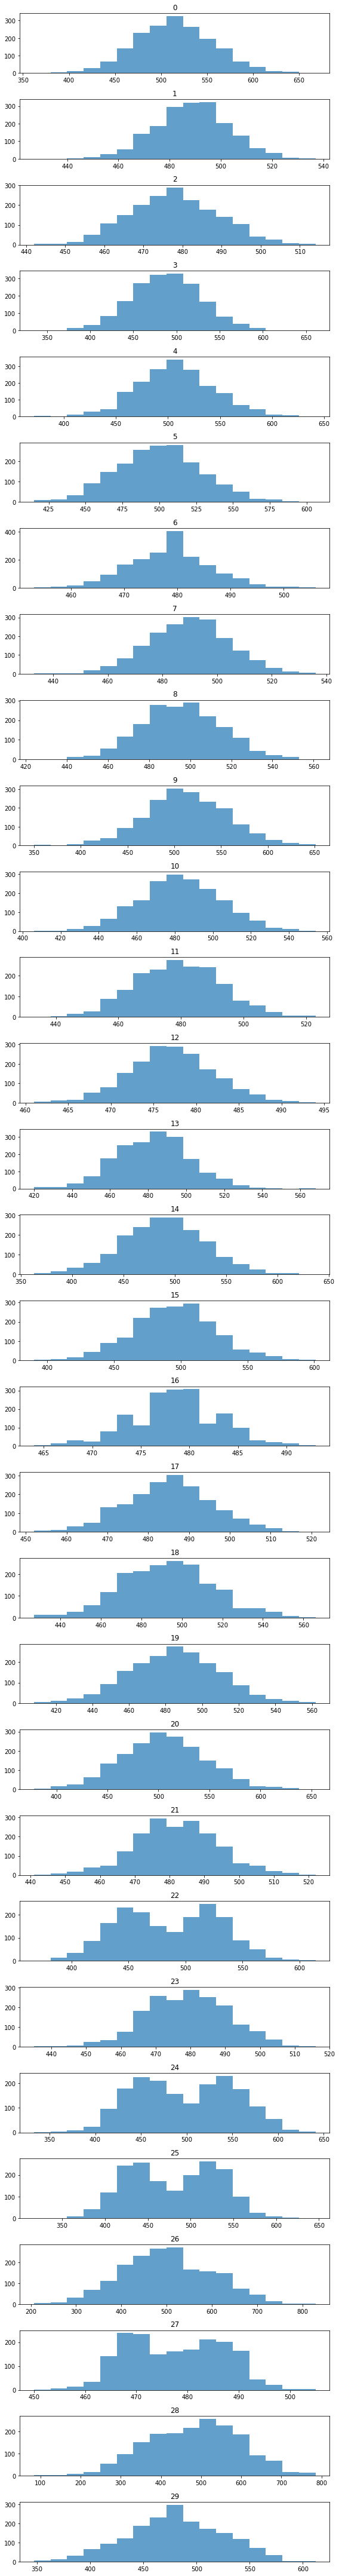

In [85]:
columns = X_train.columns

fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 2 * len(columns)))

# Iteruj po kolumnach i rysuj histogramy
for i, col in enumerate(columns):
    axes[i].hist(X_train[col], bins=17, alpha=0.7)
    axes[i].set_title(col)
    
plt.tight_layout()

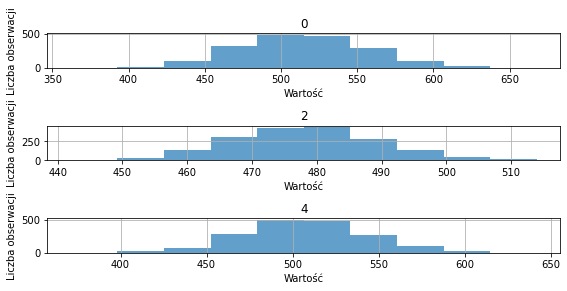

In [93]:
selected_columns = [columns[0], columns[2], columns[4]]

fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(8, 4))

for i, col in enumerate(selected_columns):
    axes[i].hist(X_train[col], bins=10, alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('Wartość')
    axes[i].set_ylabel('Liczba obserwacji')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 2. Selekcja zmiennych

# 2.1 PCA

Tutaj wydaje mi się, że będzie trzeba też i ten X_test przeskalować

In [5]:
pca = PCA()
X_transformed = pca.fit_transform(X_train)

In [6]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [7]:
pca2 = PCA()
X_train_transformed = std_scaler.fit_transform(X_train)
X_transformed2 = pca2.fit_transform(X_train_transformed)

In [8]:
pca.components_

array([[ 8.33373805e-03, -2.53074324e-04,  2.69317111e-04,
        -8.00466757e-03,  2.79110495e-04,  2.31200754e-03,
        -2.15204269e-04, -2.30543678e-03, -1.09666944e-03,
         2.67939146e-02, -6.80972161e-03,  1.52435326e-03,
        -5.12505237e-04, -1.94855280e-03,  1.27509525e-03,
        -7.90920297e-04,  7.33372254e-04,  1.81031986e-03,
         3.31120045e-03,  2.37455025e-03, -5.72712227e-03,
        -1.15063811e-03, -6.36259336e-02, -5.05892575e-02,
         5.93151351e-02, -3.14371228e-01,  4.61061177e-01,
         2.05967364e-03, -8.22999706e-01, -1.27135021e-02],
       [ 4.96238333e-03, -2.31519433e-03,  3.46549569e-04,
        -1.27313119e-02, -2.96145799e-03, -4.40314460e-03,
        -7.56904403e-04, -5.31867360e-03, -2.74310654e-03,
         2.22505207e-02,  9.48876882e-04, -1.44590119e-03,
        -2.69354188e-04, -5.08824655e-03, -1.70685480e-02,
        -1.20409928e-02,  1.19044313e-03,  1.45328328e-03,
         3.29554100e-03,  7.55103104e-04, -3.70989179e-

In [9]:
pca.explained_variance_ratio_

array([3.39979723e-01, 2.51852566e-01, 4.23981990e-02, 3.90614122e-02,
       3.80174057e-02, 3.70067233e-02, 3.50909762e-02, 3.39877243e-02,
       3.18937739e-02, 2.79060371e-02, 1.96954011e-02, 1.78116058e-02,
       1.36736183e-02, 1.22619040e-02, 1.04038955e-02, 9.69658348e-03,
       7.92116812e-03, 7.62918929e-03, 4.44208471e-03, 4.17529076e-03,
       3.80944253e-03, 2.93548480e-03, 2.72244434e-03, 2.21713989e-03,
       1.25699055e-03, 9.88391742e-04, 5.55139226e-04, 4.30806691e-04,
       1.35125883e-04, 4.37519922e-05])

In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.33997972, 0.59183229, 0.63423049, 0.6732919 , 0.71130931,
       0.74831603, 0.78340701, 0.81739473, 0.8492885 , 0.87719454,
       0.89688994, 0.91470155, 0.92837517, 0.94063707, 0.95104097,
       0.96073755, 0.96865872, 0.97628791, 0.98072999, 0.98490528,
       0.98871472, 0.99165021, 0.99437265, 0.99658979, 0.99784678,
       0.99883518, 0.99939032, 0.99982112, 0.99995625, 1.        ])

<AxesSubplot:>

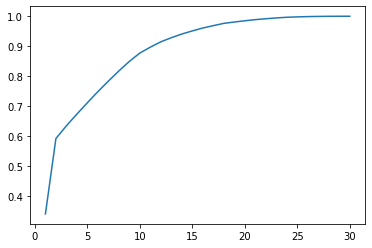

In [11]:
sns.lineplot(x = np.arange(1, 31, 1, dtype=int), y = np.cumsum(pca.explained_variance_ratio_))

### z tych rozważań wychodzi, że można odrzucić 15 zmiennych, żeby mieć nadal jakieś dobre wyniki

In [12]:
pca2.explained_variance_ratio_

array([0.10223316, 0.06666963, 0.04248524, 0.03933139, 0.03898143,
       0.03819922, 0.03782381, 0.03728332, 0.03658869, 0.03612849,
       0.03526434, 0.03477364, 0.03420661, 0.0338802 , 0.03353402,
       0.0325437 , 0.03191729, 0.03149428, 0.03115187, 0.03074801,
       0.03018755, 0.02983111, 0.02980897, 0.02810515, 0.02751549,
       0.02671614, 0.02156777, 0.00037132, 0.0003405 , 0.00031768])

### A teraz elegancko na jednym wykresie


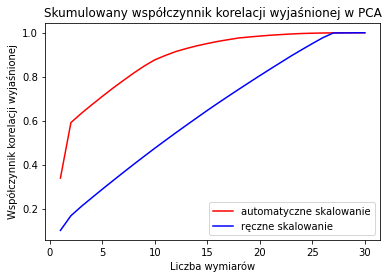

In [80]:
sns.lineplot(x = np.arange(1, 31, 1, dtype=int), y = np.cumsum(pca.explained_variance_ratio_), color = 'red', label='automatyczne skalowanie')
sns.lineplot(x = np.arange(1, 31, 1, dtype=int), y = np.cumsum(pca2.explained_variance_ratio_), color = 'blue', label = 'ręczne skalowanie')
plt.xlabel('Liczba wymiarów')
plt.ylabel('Współczynnik korelacji wyjaśnionej')
plt.title('Skumulowany współczynnik korelacji wyjaśnionej w PCA')
plt.savefig('pca_compare.pdf')

In [15]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.951)
# w dokumentacji argmaxa można przeczytać, że "In case of multiple occurrences of the maximum values, the indices
# corresponding to the first occurrence are returned"

14

Powiedzmy, że satysfakcjonuje nas poziom 95,1 % skumulowanego współczynnika korelacji. Chcemy zatem pozostawić 15 głównych komponentów, a resztę wyrzucić dla przyspieszenie obliczeń ale i dla , być może, poprawy jakości modelu.

In [16]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
88,521,513,471,515,503,535,479,489,486,551,...,478,490,509,469,538,449,549,479,237,421
722,559,487,473,458,500,443,468,486,490,443,...,603,497,540,505,548,527,292,493,522,387
1507,494,506,482,411,566,518,478,488,510,599,...,411,482,524,500,545,540,292,489,552,419
646,437,493,485,461,444,538,471,498,493,461,...,489,478,438,471,444,429,659,470,519,564
959,486,491,482,450,551,465,472,494,494,502,...,497,467,488,494,588,533,298,469,582,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,562,491,476,411,510,477,483,487,501,476,...,478,466,528,501,478,517,403,488,636,454
459,595,476,480,501,484,475,480,490,489,553,...,511,484,420,475,548,395,522,489,291,442
1873,582,481,463,541,587,533,484,492,532,518,...,492,484,475,492,572,528,355,473,580,472
1676,539,514,479,468,492,482,477,507,486,439,...,566,461,511,481,533,432,518,480,361,458


In [26]:
X_train_transferred = pca.fit_transform(X_train)

In [27]:
X_test_transferred = pca.transform(X_test)

In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.33997972, 0.59183229, 0.63423049, 0.6732919 , 0.71130931,
       0.74831603, 0.78340701, 0.81739473, 0.8492885 , 0.87719454,
       0.89688994, 0.91470155, 0.92837517, 0.94063707, 0.95104097,
       0.96073755, 0.96865872, 0.97628791, 0.98072999, 0.98490528,
       0.98871472, 0.99165021, 0.99437265, 0.99658979, 0.99784678,
       0.99883518, 0.99939032, 0.99982112, 0.99995625, 1.        ])

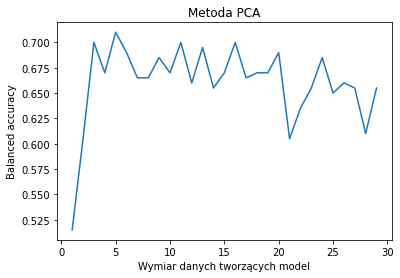

In [81]:
res = []
for i in range(1, 30):
    las = RandomForestClassifier(random_state = 311052).fit(X_train_transferred[:, :i], y_train['0'])
    res.append(las.score(X_test_transferred[:, :i], y_test))
    
plt.plot(np.arange(1,30),res)
plt.title('Metoda PCA')
plt.ylabel('Balanced accuracy')
plt.xlabel('Wymiar danych tworzących model')
plt.savefig('pca_trzeci.pdf')

## 2.2 Information gain

In [31]:
from sklearn.feature_selection import mutual_info_classif
 
importances = mutual_info_classif(X_train, y_train)
 
feature_info = pd.Series(importances, X_train.columns).sort_values(ascending=False)
feature_info

C:\Users\Kuba\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


24    0.046663
23    0.031920
26    0.026711
22    0.017062
19    0.016708
9     0.012981
25    0.012821
14    0.009036
29    0.007143
5     0.005230
1     0.005145
21    0.002780
16    0.002325
17    0.001632
18    0.000000
20    0.000000
27    0.000000
28    0.000000
0     0.000000
13    0.000000
12    0.000000
11    0.000000
10    0.000000
8     0.000000
7     0.000000
6     0.000000
4     0.000000
3     0.000000
2     0.000000
15    0.000000
dtype: float64

Text(0.5, 1.0, '')

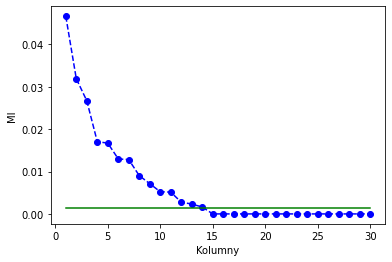

In [32]:
plt.plot(np.arange(1, 31), np.array(feature_info), 'b--o')
plt.plot([1,30], [0.0015, 0.0015], 'g-')
plt.xlabel('Kolumny')
plt.ylabel('MI')
plt.title('')

In [33]:
feature_info.index[feature_info.values > 0.0015]

Index(['24', '23', '26', '22', '19', '9', '25', '14', '29', '5', '1', '21',
       '16', '17'],
      dtype='object')

## 2.3 Fisher score

In [34]:
ranking = fisher_score.fisher_score(X_train.to_numpy(), y_train.values.ravel()) 

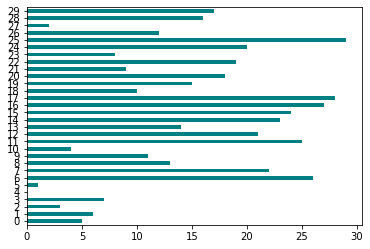

In [35]:
feat_importances = pd.Series(ranking, X_train.columns)
feat_importances.plot(kind='barh', color = 'teal')

plt.show()

In [36]:
ranks = np.abs(29-feat_importances).sort_values()

In [37]:
ranks

25     0
17     1
16     2
6      3
11     4
15     5
14     6
7      7
12     8
24     9
22    10
20    11
29    12
28    13
19    14
13    15
8     16
26    17
9     18
18    19
21    20
23    21
3     22
1     23
0     24
10    25
2     26
27    27
5     28
4     29
dtype: int32

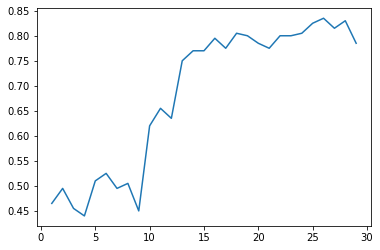

In [38]:
res = []
for i in range(1, 30):
    first_indices = ranks.head(i).index
    las = RandomForestClassifier(random_state = 311052).fit(X_train[first_indices], y_train['0'])
    res.append(las.score(X_test[first_indices], y_test))
    
plt.plot(np.arange(1,30),res)

### 2.4 Z regularyzacją LASSO

Text(0, 0.5, 'Importance')

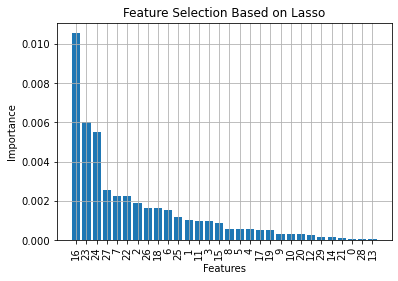

In [39]:
# -----------------------------------
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)
ps = pd.Series(lasso1_coef, X_train.columns)
ps1 = ps.sort_values(ascending=False)
indices = ps1.index.values 
# plotting the Column Names and Importance of Columns. 
plt.bar(indices, ps1.values)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")

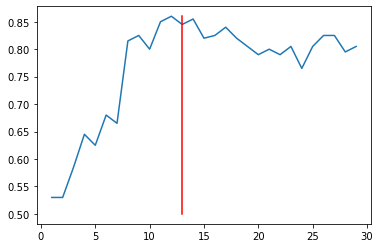

In [40]:
res = []
for i in range(1, 30):
    first_indices = indices[:i]
    las = RandomForestClassifier(random_state = 311052).fit(X_train[first_indices], y_train['0'])
    res.append(las.score(X_test[first_indices], y_test))
    
plt.plot(np.arange(1,30),res)
plt.plot([13,13], [0.5,0.86], 'r-')

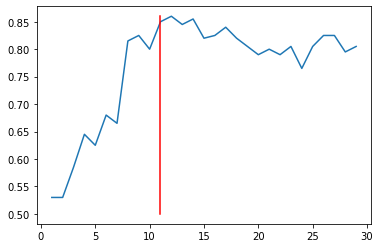

In [41]:
plt.plot(np.arange(1,30),res)
plt.plot([11,11], [0.5,0.86], 'r-')

In [42]:
first_indices = indices[:11]
las = RandomForestClassifier(random_state = 311052).fit(X_train[first_indices], y_train['0'])

In [43]:
balanced_accuracy_score(y_test, las.predict(X_test[first_indices]))

0.8517628205128205

Żeby teraz przetransferować zbiór testowy do tej samej podprzestrzeni, to trzeba pca_final.transform(X_test)

# Budowa modeli

## 3.1 Budowa modeli dla PCA

In [44]:
modele = []
statystyki = [] # statystyki to będzie lista, której każdym elementem beddzie para (score na treningowych, score na testowych)

### 3.1.1 - BaggingEstimator KNN

In [45]:
bagging_kneighbors100 = BaggingClassifier(base_estimator = KNeighborsClassifier(), 
                                  n_estimators = 100, random_state = 311052)

params = {
    'base_estimator__n_neighbors': np.arange(2, 15, 4)
    }

grid = GridSearchCV(bagging_kneighbors100, cv = 6,
                             param_grid = params, scoring = 'balanced_accuracy')

In [46]:
grid.fit(X_train_transferred, y_train["0"])

GridSearchCV(cv=6,
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(),
                                         n_estimators=100,
                                         random_state=311052),
             param_grid={'base_estimator__n_neighbors': array([ 2,  6, 10, 14])},
             scoring='balanced_accuracy')

In [47]:
grid.best_params_

{'base_estimator__n_neighbors': 10}

In [48]:
grid.best_score_

0.7318218340568223

In [49]:
treningowy_score = grid.score(X_train_transferred, y_train)
testowy_score = grid.score(X_test_transferred, y_test)

print(f"Na części treningowej: {treningowy_score}")
print(f"Na części testowej: {testowy_score}")

Na części treningowej: 0.8144802860303413
Na części testowej: 0.7291666666666667


In [50]:
modele.append("BagClfKNN")
statystyki.append((treningowy_score, testowy_score))

### 3.1.2 - RandomForestClassifier

In [51]:
las = RandomForestClassifier(n_estimators = 150, random_state = 311052)

params_las = {
    'max_depth': [8, 14],
    'min_samples_leaf': [10,15,20]
    }


grid_las = GridSearchCV(las, cv = 3, param_grid = params_las, scoring = 'balanced_accuracy')


In [52]:
grid_las.fit(X_train_transferred, y_train["0"])

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=311052),
             param_grid={'max_depth': [8, 14],
                         'min_samples_leaf': [10, 15, 20]},
             scoring='balanced_accuracy')

In [53]:
grid_las.best_params_

{'max_depth': 14, 'min_samples_leaf': 15}

In [54]:
treningowy_score = grid_las.score(X_train_transferred, y_train)
testowy_score = grid_las.score(X_test_transferred, y_test)

print(f"Na części treningowej: {treningowy_score}")
print(f"Na części testowej: {testowy_score}")

Na części treningowej: 0.883326090391909
Na części testowej: 0.624198717948718


In [55]:
modele.append("RForest")
statystyki.append((treningowy_score, testowy_score))

### 3.1.3 - ExtraTree

In [56]:
extra = ExtraTreesClassifier(random_state = 311052)

params_extra = {
    'max_depth': [8, 10, 14],
    'min_samples_leaf': [10,15,20]
    }

grid_extra = GridSearchCV(extra, cv = 3, param_grid = params_extra, scoring = 'balanced_accuracy')

In [57]:
grid_extra.fit(X_train_transferred, y_train["0"])

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=311052),
             param_grid={'max_depth': [8, 10, 14],
                         'min_samples_leaf': [10, 15, 20]},
             scoring='balanced_accuracy')

In [58]:
treningowy_score = grid_extra.score(X_train_transferred, y_train)
testowy_score = grid_extra.score(X_test_transferred, y_test)

print(f"Na części treningowej: {treningowy_score}")
print(f"Na części testowej: {testowy_score}")

Na części treningowej: 0.8227076090391909
Na części testowej: 0.5849358974358975


In [59]:
modele.append("ExTrees")
statystyki.append((treningowy_score, testowy_score))

### Podsumowanie graficzne

In [60]:
train_evals = [t[0] for t in statystyki]
test_evals = [t[1] for t in statystyki]

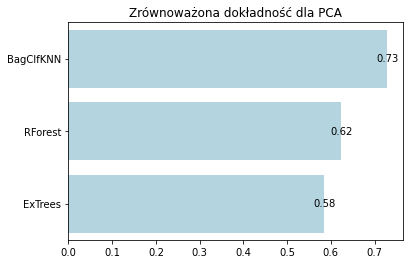

In [61]:
plot = sns.barplot(x = test_evals, y = modele, color = 'lightblue')
for index, value in enumerate(test_evals):
    plot.text(value, index, f'{value:.2f}', color='black', ha="center", va="center")
plt.title('Zrównoważona dokładność dla PCA')
plt.savefig('pca_stats.pdf')

## 3.2 Budowa modeli na początkowym zbiorze treningowym bez redukcji żadnych kolumn

In [62]:
modele2 = []
statystyki2 = [] # statystyki to będzie lista, której każdym elementem beddzie para (score na treningowych, score na testowych)

### 3.2.1 - BaggingEstimator KNN

In [63]:
bagging_kneighbors100 = BaggingClassifier(base_estimator = KNeighborsClassifier(), 
                                  n_estimators = 100, random_state = 311052)

params = {
    'base_estimator__n_neighbors': np.arange(2, 15, 4)
    }

grid = GridSearchCV(bagging_kneighbors100, cv = 6,
                             param_grid = params, scoring = 'balanced_accuracy')

In [64]:
grid.fit(X_train, y_train["0"])

GridSearchCV(cv=6,
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(),
                                         n_estimators=100,
                                         random_state=311052),
             param_grid={'base_estimator__n_neighbors': array([ 2,  6, 10, 14])},
             scoring='balanced_accuracy')

In [65]:
grid.best_params_

{'base_estimator__n_neighbors': 10}

In [66]:
grid.best_score_

0.7318218340568223

In [67]:
treningowy_score = grid.score(X_train, y_train)
testowy_score = grid.score(X_test, y_test)

print(f"Na części treningowej: {treningowy_score}")
print(f"Na części testowej: {testowy_score}")

Na części treningowej: 0.8144802860303413
Na części testowej: 0.7291666666666667


In [68]:
modele2.append("BagClfKNN")
statystyki2.append((treningowy_score, testowy_score))

### 3.2.2 - RandomForestClassifier

In [69]:
las = RandomForestClassifier(n_estimators = 150, random_state = 311052)

params_las = {
    'max_depth': [8, 14],
    'min_samples_leaf': [10,15,20]
    }


grid_las = GridSearchCV(las, cv = 3, param_grid = params_las, scoring = 'balanced_accuracy')

In [70]:
grid_las.fit(X_train, y_train["0"])

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=311052),
             param_grid={'max_depth': [8, 14],
                         'min_samples_leaf': [10, 15, 20]},
             scoring='balanced_accuracy')

In [71]:
grid_las.best_params_

{'max_depth': 14, 'min_samples_leaf': 10}

In [72]:
treningowy_score = grid_las.score(X_train, y_train)
testowy_score = grid_las.score(X_test, y_test)

print(f"Na części treningowej: {treningowy_score}")
print(f"Na części testowej: {testowy_score}")

Na części treningowej: 0.9349468631479141
Na części testowej: 0.8173076923076923


In [73]:
modele2.append("RForest")
statystyki2.append((treningowy_score, testowy_score))

### 3.2.3 - ExtraTree

In [74]:
extra = ExtraTreesClassifier(random_state = 311052)

params_extra = {
    'max_depth': [8, 10, 14],
    'min_samples_leaf': [10,15,20]
    }

grid_extra = GridSearchCV(extra, cv = 3, param_grid = params_extra, scoring = 'balanced_accuracy')

In [75]:
grid_extra.fit(X_train, y_train["0"])

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=311052),
             param_grid={'max_depth': [8, 10, 14],
                         'min_samples_leaf': [10, 15, 20]},
             scoring='balanced_accuracy')

In [76]:
treningowy_score = grid_extra.score(X_train, y_train)
testowy_score = grid_extra.score(X_test, y_test)

print(f"Na części treningowej: {treningowy_score}")
print(f"Na części testowej: {testowy_score}")

Na części treningowej: 0.870392501580278
Na części testowej: 0.7271634615384616


In [77]:
modele2.append("ExTrees")
statystyki2.append((treningowy_score, testowy_score))

### Podsumowanie graficzne

In [78]:
train_evals = [t[0] for t in statystyki2]
test_evals = [t[1] for t in statystyki2]

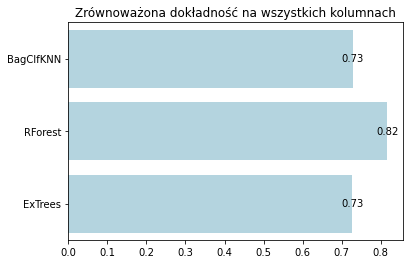

In [79]:
plot = sns.barplot(x = test_evals, y = modele, color = 'lightblue')
for index, value in enumerate(test_evals):
    plot.text(value, index, f'{value:.2f}', color='black', ha="center", va="center")
plt.title('Zrównoważona dokładność na wszystkich kolumnach')
plt.savefig('pelne.pdf')

## 3.3 Information gain

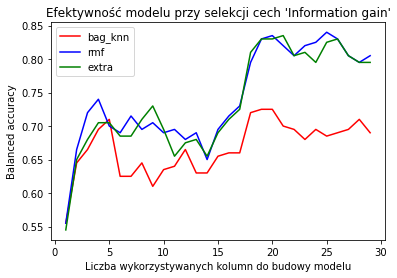

In [130]:
res_knn = []
res_las = []
res_ex = []

for i in range(1, 30):
    first_indices = feature_info.head(i).index
    bag_knn = BaggingClassifier(base_estimator = KNeighborsClassifier(), 
                                  n_estimators = 100, random_state = 311052).fit(X_train[first_indices], y_train['0'])
    res_knn.append(bag_knn.score(X_test[first_indices], y_test))
    
    las = RandomForestClassifier(random_state = 311052).fit(X_train[first_indices], y_train['0'])
    res_las.append(las.score(X_test[first_indices], y_test))
    
    extra = ExtraTreesClassifier(random_state = 311052).fit(X_train[first_indices], y_train['0'])
    res_ex.append(extra.score(X_test[first_indices], y_test))
    
plt.plot(np.arange(1,30),res_knn, 'r-', label='bag_knn')
plt.plot(np.arange(1,30),res_las, 'b-', label='rmf')
plt.plot(np.arange(1,30),res_ex, 'g-', label='extra')
plt.xlabel('Liczba wykorzystywanych kolumn do budowy modelu')
plt.ylabel('Balanced accuracy')
plt.legend()
plt.title('Efektywność modelu przy selekcji cech \'Information gain\'')
plt.savefig('mi.pdf')

## 3.4 Fisher score

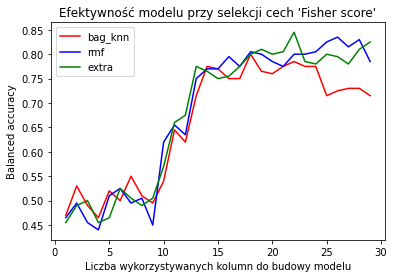

In [128]:
res_knn = []
res_las = []
res_ex = []

for i in range(1, 30):
    first_indices = ranks.head(i).index
    bag_knn = BaggingClassifier(base_estimator = KNeighborsClassifier(), 
                                  n_estimators = 100, random_state = 311052).fit(X_train[first_indices], y_train['0'])
    res_knn.append(bag_knn.score(X_test[first_indices], y_test))
    
    las = RandomForestClassifier(random_state = 311052).fit(X_train[first_indices], y_train['0'])
    res_las.append(las.score(X_test[first_indices], y_test))
    
    extra = ExtraTreesClassifier(random_state = 311052).fit(X_train[first_indices], y_train['0'])
    res_ex.append(extra.score(X_test[first_indices], y_test))
    
plt.plot(np.arange(1,30),res_knn, 'r-', label='bag_knn')
plt.plot(np.arange(1,30),res_las, 'b-', label='rmf')
plt.plot(np.arange(1,30),res_ex, 'g-', label='extra')
plt.xlabel('Liczba wykorzystywanych kolumn do budowy modelu')
plt.ylabel('Balanced accuracy')
plt.legend()
plt.title('Efektywność modelu przy selekcji cech \'Fisher score\'')
plt.savefig('fisher.pdf')

## 3.5 Regularyzacja L1

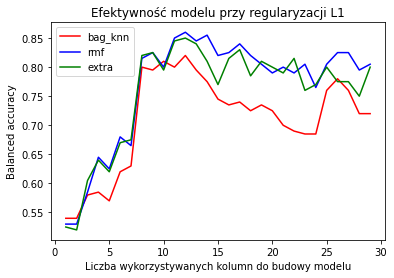

In [129]:
res_knn = []
res_las = []
res_ex = []

for i in range(1, 30):
    first_indices = indices[:i]
    bag_knn = BaggingClassifier(base_estimator = KNeighborsClassifier(), 
                                  n_estimators = 100, random_state = 311052).fit(X_train[first_indices], y_train['0'])
    res_knn.append(bag_knn.score(X_test[first_indices], y_test))
    
    las = RandomForestClassifier(random_state = 311052).fit(X_train[first_indices], y_train['0'])
    res_las.append(las.score(X_test[first_indices], y_test))
    
    extra = ExtraTreesClassifier(random_state = 311052).fit(X_train[first_indices], y_train['0'])
    res_ex.append(extra.score(X_test[first_indices], y_test))
    
plt.plot(np.arange(1,30),res_knn, 'r-', label='bag_knn')
plt.plot(np.arange(1,30),res_las, 'b-', label='rmf')
plt.plot(np.arange(1,30),res_ex, 'g-', label='extra')
plt.xlabel('Liczba wykorzystywanych kolumn do budowy modelu')
plt.ylabel('Balanced accuracy')
plt.legend()
plt.title('Efektywność modelu przy regularyzacji L1')
plt.savefig('lasso.pdf')

# 4. Ostateczny wybór i budowa modelu

In [82]:
las = RandomForestClassifier(random_state=311052)

In [83]:
params_las = {
    'max_depth': [8,11,14,17,20],
    'min_samples_leaf': [3,5,10,15,20]
}

grid_las = GridSearchCV(las, cv=4, param_grid = params_las, scoring = 'balanced_accuracy')

In [84]:
grid_las.fit(X_train[indices[:12]], y_train['0'])

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=311052),
             param_grid={'max_depth': [8, 11, 14, 17, 20],
                         'min_samples_leaf': [3, 5, 10, 15, 20]},
             scoring='balanced_accuracy')

In [95]:
grid_las.best_score_

0.8048899731352718

In [96]:
grid_las.best_params_

{'max_depth': 20, 'min_samples_leaf': 3}

In [97]:
grid_las.score(X_test[indices[:12]], y_test)

0.8517628205128205

## Bez GridSearche'a

In [98]:
las_nzal = RandomForestClassifier(random_state=311052).fit(X_train[indices[:12]], y_train['0'])
print(las_nzal.score(X_train[indices[:12]], y_train))
print(las_nzal.score(X_test[indices[:12]], y_test))

1.0
0.86


# 5. Generowanie prawdopodobieństw

In [239]:
prawdopodobienstwa = las.predict_proba(Z_test[first_indices])[:, 1]
nazwa_pliku = "311052_artifical_prediction.txt"

with open(nazwa_pliku, 'w') as plik:
    plik.write("311052" + '\n')
    for pstwo in prawdopodobienstwa:
        plik.write(str(pstwo) + '\n')